In [1]:
import torch

print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)


CUDA Available: True
Device Name: NVIDIA GeForce RTX 3060 Laptop GPU
CUDA Version: 12.6


In [2]:
import pandas as pd 

data = pd.read_csv('../dataset/icml_face_data.csv')


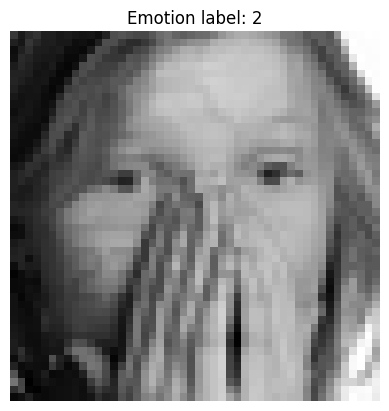

In [3]:
import numpy as np
import matplotlib.pyplot as plt
id = 45 
label = int(data.iloc[id]['emotion'])
pixel_seq = data.iloc[id, 2]
image = np.fromstring(pixel_seq, sep=' ', dtype=np.uint8).reshape(48, 48)

plt.imshow(image, cmap='gray')  # Show as grayscale
plt.title(f'Emotion label: {label}')
plt.axis('off')  # Hide axis ticks
plt.show()


In [1]:
import sys
sys.path.append("..")  # or "." depending on notebook location

import yaml 

with open("../cfgs/cnn_fer.yaml","r") as f:
    cfg = yaml.safe_load(f)


In [5]:
from utils.dataset import DataModule
from torchvision import transforms


# Define any transform (optional)
transform = transforms.Compose([
    transforms.Normalize(mean=[0.5], std=[0.5])
])
#cfg = cnn_fer.cfg
# Extract data config
data_cfg = cfg['data_args']

# Initialize data module
dm = DataModule(
    path=data_cfg['path'],
    transform=transform,
    batch_size=data_cfg['batch_size'],
    num_workers=data_cfg['num_workers'],
    shuffle=True,
    pin_memory=data_cfg['pin_memory']
)

# Get train loader
train_loader = dm.get_train_loader()

# Fetch one batch and inspect
for labels, images in train_loader:
    print(f"✅ Image batch shape: {images.shape}")   # Expected: (64, 1, 48, 48)
    print(f"✅ Labels shape: {labels.shape}")         # Expected: (64,)
    print(f"✅ Unique labels in batch: {labels.unique()}")
    break


✅ Image batch shape: torch.Size([1, 1, 48, 48])
✅ Labels shape: torch.Size([1])
✅ Unique labels in batch: tensor([4])


In [2]:
from models.convnetfer_model import ConvNetFer

model = eval(cfg['model_name'])(**cfg['model_args'])
